KeyError: 'potential'

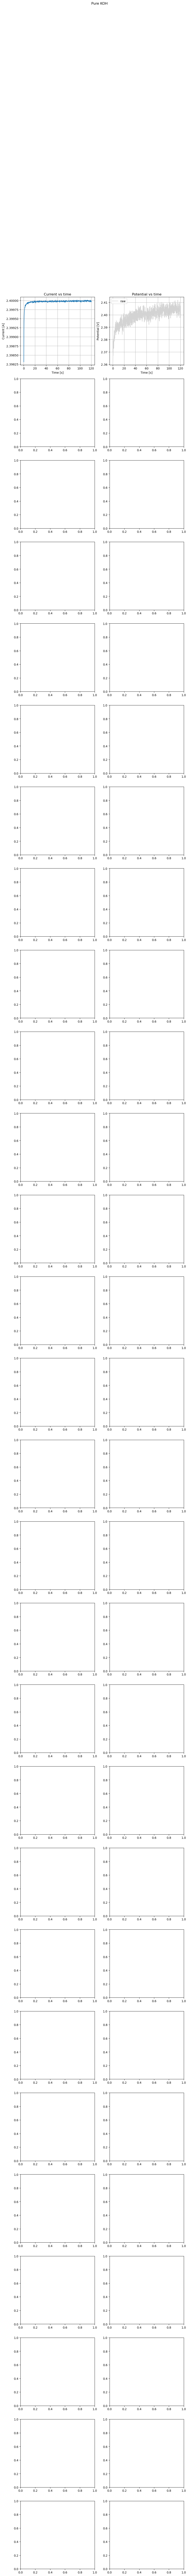

In [1]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt
import numpy as np

A = Measurement((2024, 11,15, 16,0,0), (2024, 11, 15, 18,30,0), 'experiment 2 6.5M KOH 10mM LiOH')
start_times = []
end_times = []


data = A.TRScans
ws = 10


fig, ax = plt.subplots(ncols = 2, nrows = len(data), figsize = (10, 5*len(data)))
fig.suptitle('Pure KOH')
for i in range(len(data)):
    ax[i, 0].set_title('Current vs time')
    ax[i, 0].plot(data[i]['time'], data[i]['I'])
    ax[i, 0].grid()
    ax[i, 0].set_xlabel('Time [s]')
    ax[i, 0].set_ylabel('Current [A]')

    ax[i, 1].set_title('Potential vs time')
    ax[i, 1].plot(data[i]['time'], data[i]['V'], label = 'raw', color = 'lightgrey')
    ax[i, 1].grid()
    ax[i, 1].set_xlabel('Time [s]')
    ax[i, 1].set_ylabel('Potential [V]')
    ax[i, 1].legend()
    ax[i, 1].set_ylim(min(data[i]['V'])/1.1, max(data[i]['V'])*1.1)

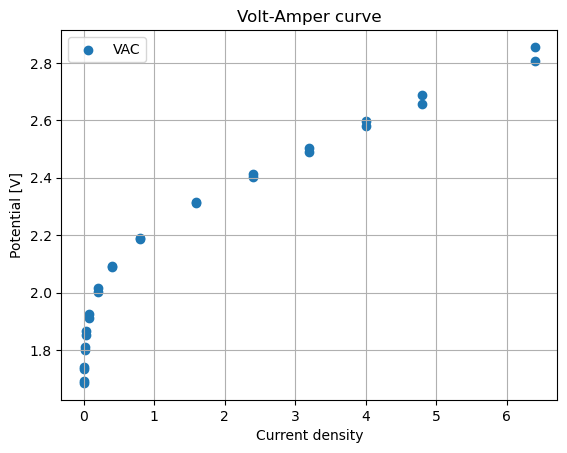

In [18]:
plt.scatter(A.js, A.vs, label = 'VAC')
plt.grid(which='both')
plt.title('Volt-Amper curve')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend()

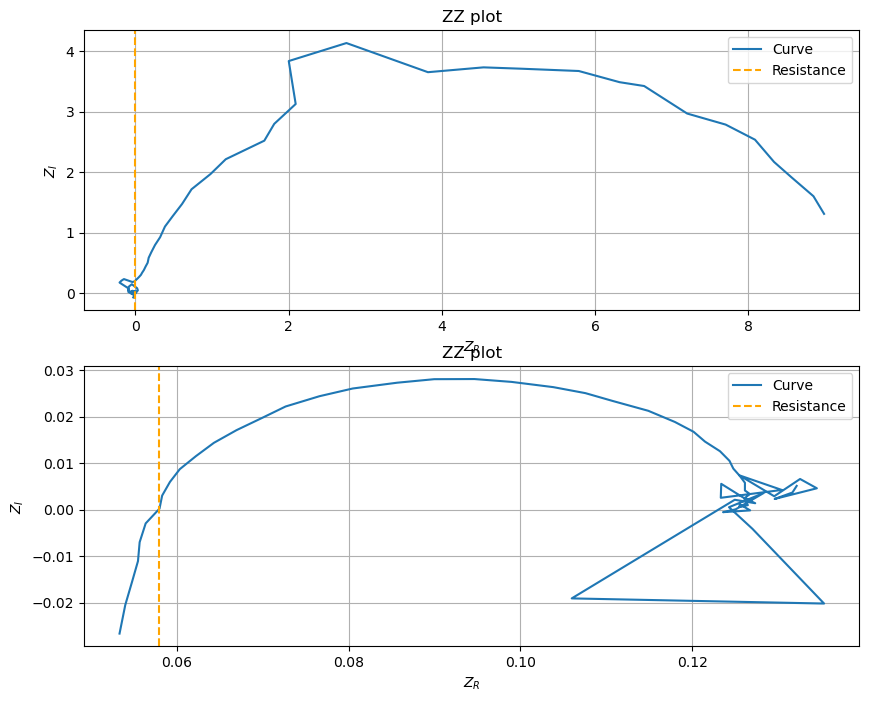

In [12]:
data = A.ZZplots[:2]
#data['potential_filtered'] = medfilt(data['potential'], kernel_size=11)
ws = 10


fig, ax = plt.subplots(nrows = len(data), figsize = (10, 4*len(data)))
for i in range(len(data)):
    ax[i].set_title('ZZ plot')
    ax[i].plot(data[i]['1'], data[i]['2'], label = 'Curve')
    ax[i].grid()
    ax[i].set_xlabel('$Z_R$')
    ax[i].set_ylabel('$Z_I$')
    ax[i].axvline(A.rs[i], linestyle ='--', color = 'orange', label = 'Resistance')
    ax[i].legend(loc = 'upper right')

Text(0, 0.5, 'Ohmic resistance [$\\Omega$]')

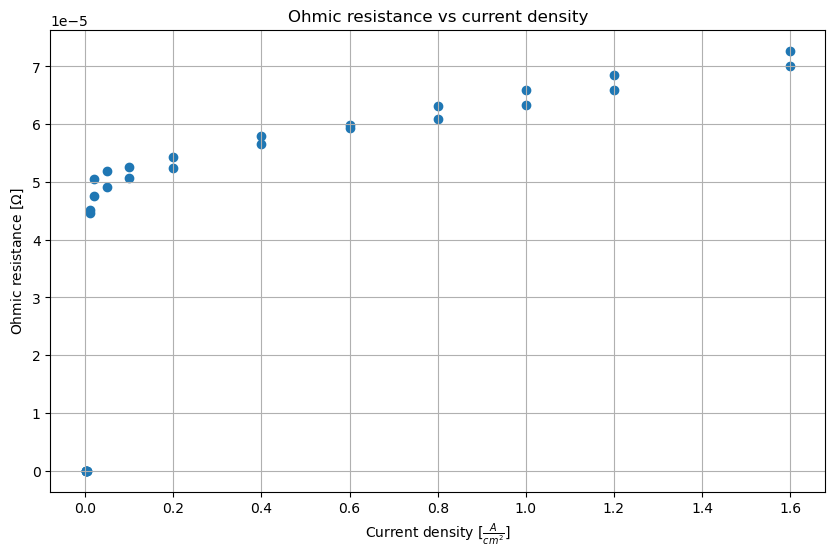

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(A.currents_ZZ, A.rs/1000)
ax.grid()
ax.set_title('Ohmic resistance vs current density')
ax.set_xlabel('Current density [$\\frac{A}{cm^2}$]')
ax.set_ylabel('Ohmic resistance [$\\Omega$]')

Text(0, 0.5, 'Averabe omic resistance')

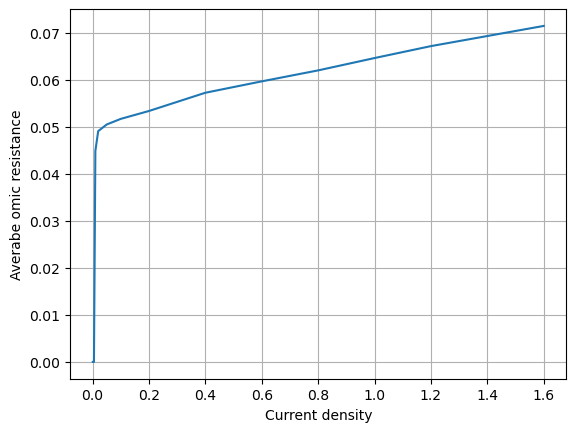

In [14]:
plt.plot(A.JR_dataframe['Current Density'], A.JR_dataframe['Resistance'])
plt.grid()
plt.xlabel('Current density')
plt.ylabel('Averabe omic resistance')

Text(0, 0.5, 'Overpotential')

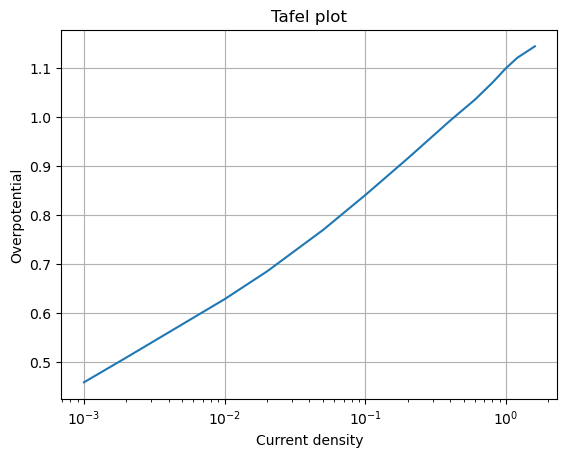

In [15]:
plt.plot(A.JR_dataframe['Current Density'], A.overpotential)
plt.xscale('log')
plt.grid()
plt.title('Tafel plot')
plt.xlabel('Current density')
plt.ylabel('Overpotential')

In [16]:
print(A.slope)

0.21971332434932325


In [17]:
data = A.VAC_dataframe[A.VAC_dataframe['Current Density'] == 0.4]
print(data)


   Current Density  Potential
8              0.4   2.313312
